In order to be able to graph multiple spectra simultaneously, glob was used to import multiple files into an empty list called Data.

In [1]:
import glob
Data = [] #(This is an empty list)
for each_file in glob.iglob('*.txt'):
    Data.append(each_file)
print(Data)

['B_Tc20_PL1mm_Ti_PBS_blank.txt', 'S_Tc20_TPC10um_AB30_PL1mm_Ti_5uM EE KK Sample.txt', 'S_Tc20_TPC120um_AB30_PL1mm_Ti_60uM EE KK Sample.txt', 'S_Tc20_TPC15um_AB30_PL1mm_Ti_7_5uM EE KK Sample.txt', 'S_Tc20_TPC20um_AB30_PL1mm_Ti_10uM EE KK Sample.txt', 'S_Tc20_TPC25um_AB30_PL1mm_Ti_12_5uM EE KK Sample.txt', 'S_Tc20_TPC30um_AB30_PL1mm_Ti_15uM EE KK Sample.txt', 'S_Tc20_TPC35um_AB30_PL1mm_Ti_17_5uM EE KK Sample.txt', 'S_Tc20_TPC40um_AB30_PL1mm_Ti_20uM EE KK Sample.txt', 'S_Tc20_TPC50um_AB30_PL1mm_Ti_25uM EE KK Sample.txt', 'S_Tc20_TPC60um_AB30_PL1mm_Ti_30uM EE KK Sample.txt', 'S_Tc20_TPC70um_AB30_PL1mm_Ti_35uM EE KK Sample.txt', 'S_Tc20_TPC80um_AB30_PL1mm_Ti_40uM EE KK Sample.txt']


Once read in the next challenge is to read in all of the files in the Data list and putting it in the new list Data1. At the same time the column names were changed to something sensible.

In [2]:
import pandas as pd
Data1 = []
for each_file in Data:
    each_file = pd.read_csv(each_file, skiprows=19,  sep='\s+' , header=None)
    each_file = each_file.rename(columns = 
           {0:"Wavelength", 1:"MRE", 2:"HTV"})
    Data1.append(each_file)
print(Data1)

[    Wavelength        MRE       HTV
0        260.0   0.153055   368.420
1        259.0   0.337488   370.071
2        258.0   0.526726   371.670
3        257.0   0.401387   373.278
4        256.0   0.287523   374.851
..         ...        ...       ...
66       194.0   2.339770   952.279
67       193.0  -9.905820   994.768
68       192.0  13.847600  1004.180
69       191.0  15.782100  1005.970
70       190.0 -28.062900  1005.800

[71 rows x 3 columns],     Wavelength       MRE       HTV
0        260.0  0.262355   368.001
1        259.0  0.252686   369.623
2        258.0  0.416644   371.224
3        257.0  0.291650   372.808
4        256.0  0.066389   374.358
..         ...       ...       ...
66       194.0  1.374270   973.995
67       193.0 -3.926140   996.594
68       192.0  5.779140   999.671
69       191.0  4.719580  1004.820
70       190.0  4.802060  1005.940

[71 rows x 3 columns],     Wavelength       MRE       HTV
0        260.0  0.344749   370.640
1        259.0  0.477636   37

These two lists were then zipped together to form the dictionary dict1 so that they can be linked and information could be extracted from the name of the files.

In [3]:
dict1 = dict(zip(Data,Data1))
print(dict1)
    

{'B_Tc20_PL1mm_Ti_PBS_blank.txt':     Wavelength        MRE       HTV
0        260.0   0.153055   368.420
1        259.0   0.337488   370.071
2        258.0   0.526726   371.670
3        257.0   0.401387   373.278
4        256.0   0.287523   374.851
..         ...        ...       ...
66       194.0   2.339770   952.279
67       193.0  -9.905820   994.768
68       192.0  13.847600  1004.180
69       191.0  15.782100  1005.970
70       190.0 -28.062900  1005.800

[71 rows x 3 columns], 'S_Tc20_TPC10um_AB30_PL1mm_Ti_5uM EE KK Sample.txt':     Wavelength       MRE       HTV
0        260.0  0.262355   368.001
1        259.0  0.252686   369.623
2        258.0  0.416644   371.224
3        257.0  0.291650   372.808
4        256.0  0.066389   374.358
..         ...       ...       ...
66       194.0  1.374270   973.995
67       193.0 -3.926140   996.594
68       192.0  5.779140   999.671
69       191.0  4.719580  1004.820
70       190.0  4.802060  1005.940

[71 rows x 3 columns], 'S_Tc20_TPC12

Having established this dictionary we next need to be able to be able to pull out the blank data and then subtract this from the blank MRE data from sample data. First we need to be able to recognise the word 'blank' in the title and the pull that from the dictionary. Initially tried using wild card characters as with glob but these are not supported and requires the fnmatch module. We import this and the check to see if it is working.

In [4]:
import fnmatch
fnmatch.fnmatch('test', 't??t')

True

Next we create a loop using fnmatch to identify variables in the dictionary that include the word blank in the title, extract it and put it in the empty 'blank' list. Initially this code did not work as the source it was adapted from (https://stackoverflow.com/questions/52656701/wildcard-in-dictionary-key) used it to produce flexible keys within dictionaries. This was solved by changing 'if fnmatch.fnmatch(blank_identification, name):' to 'if fnmatch.fnmatch(name, blank_identification):'. After this, I needed to remove the blank dataset from the dictionary which proved harder than expected as its name would change. Adding del() or pop() functions into the for loop didn't work as it changed the length of the dictionary in the middle of a for loop which through up an error.

In [5]:
from pandas import DataFrame
blank_identification = 'B_*'
for name, data in dict1.items():
    if fnmatch.fnmatch(name, blank_identification):
        blank = pd.DataFrame(data)
print(blank)
print(blank["MRE"])

    Wavelength        MRE       HTV
0        260.0   0.153055   368.420
1        259.0   0.337488   370.071
2        258.0   0.526726   371.670
3        257.0   0.401387   373.278
4        256.0   0.287523   374.851
..         ...        ...       ...
66       194.0   2.339770   952.279
67       193.0  -9.905820   994.768
68       192.0  13.847600  1004.180
69       191.0  15.782100  1005.970
70       190.0 -28.062900  1005.800

[71 rows x 3 columns]
0      0.153055
1      0.337488
2      0.526726
3      0.401387
4      0.287523
        ...    
66     2.339770
67    -9.905820
68    13.847600
69    15.782100
70   -28.062900
Name: MRE, Length: 71, dtype: float64


The problem of removing the blank was done using a rather round about method. By using a for loop to search through the keys this time using 'dict1.keys()' the blank name could exported. Outside of the loop the pop() function could be used to remove the blank data set from the dictionary. This avoids problems later down the line, as the blank title code does not usually fit the same format as the samples which caused problems. It also had to be removed from the Data list of file names as this is used below to form the blanked_dict.

In [6]:
blank_identification = 'B_*'
for name in dict1.keys():
    if fnmatch.fnmatch(name, blank_identification):
        print(name)
        blank_name = name
print(dict1.pop(blank_name))
Data.remove(blank_name)
print(Data)

B_Tc20_PL1mm_Ti_PBS_blank.txt
    Wavelength        MRE       HTV
0        260.0   0.153055   368.420
1        259.0   0.337488   370.071
2        258.0   0.526726   371.670
3        257.0   0.401387   373.278
4        256.0   0.287523   374.851
..         ...        ...       ...
66       194.0   2.339770   952.279
67       193.0  -9.905820   994.768
68       192.0  13.847600  1004.180
69       191.0  15.782100  1005.970
70       190.0 -28.062900  1005.800

[71 rows x 3 columns]
['S_Tc20_TPC10um_AB30_PL1mm_Ti_5uM EE KK Sample.txt', 'S_Tc20_TPC120um_AB30_PL1mm_Ti_60uM EE KK Sample.txt', 'S_Tc20_TPC15um_AB30_PL1mm_Ti_7_5uM EE KK Sample.txt', 'S_Tc20_TPC20um_AB30_PL1mm_Ti_10uM EE KK Sample.txt', 'S_Tc20_TPC25um_AB30_PL1mm_Ti_12_5uM EE KK Sample.txt', 'S_Tc20_TPC30um_AB30_PL1mm_Ti_15uM EE KK Sample.txt', 'S_Tc20_TPC35um_AB30_PL1mm_Ti_17_5uM EE KK Sample.txt', 'S_Tc20_TPC40um_AB30_PL1mm_Ti_20uM EE KK Sample.txt', 'S_Tc20_TPC50um_AB30_PL1mm_Ti_25uM EE KK Sample.txt', 'S_Tc20_TPC60um_AB30_PL

To blank the data we must now subtract the MRE data in the blank list from the MRE data in library of samples. To do this we must loop through the library subtracting the data from each sample. Initially this was tried using a loop to call collumn 2 but this appeared to give the second row. To avoid this confusion collum was called using sample["MRE"].

In [7]:
blanked_data = []
for sample in dict1.values():
    df = pd.DataFrame(columns=['Wavelength', 'MRE', 'HTV'])
    df["MRE"] = (sample["MRE"]-blank["MRE"])
    df["Wavelength"] = sample["Wavelength"]
    df["HTV"] = sample["HTV"]
    blanked_data.append(df)
blanked_dict = dict(zip(Data,blanked_data))
print(blanked_dict)

{'S_Tc20_TPC10um_AB30_PL1mm_Ti_5uM EE KK Sample.txt':     Wavelength        MRE       HTV
0        260.0   0.109300   368.001
1        259.0  -0.084802   369.623
2        258.0  -0.110082   371.224
3        257.0  -0.109737   372.808
4        256.0  -0.221134   374.358
..         ...        ...       ...
66       194.0  -0.965500   973.995
67       193.0   5.979680   996.594
68       192.0  -8.068460   999.671
69       191.0 -11.062520  1004.820
70       190.0  32.864960  1005.940

[71 rows x 3 columns], 'S_Tc20_TPC120um_AB30_PL1mm_Ti_60uM EE KK Sample.txt':     Wavelength        MRE       HTV
0        260.0   0.191694   370.640
1        259.0   0.140148   372.121
2        258.0  -0.113738   373.598
3        257.0  -0.110793   375.061
4        256.0  -0.045360   376.498
..         ...        ...       ...
66       194.0  -2.560293  1005.970
67       193.0   7.689830  1005.950
68       192.0 -11.282140  1005.970
69       191.0 -10.297660  1005.980
70       190.0  32.754280  1005.980

[7

This code uses the re module which is used to recognise patterns and in this case extracts data from it. re.match function utilises the standardised naming system, using the code at the beginning of each value (e.g. Tc for temp in celcius) and defines the value after that as a group (in brackets). Initially it was difficult for this extracted data to be used as it is extracted as a string. For each we therefore have to use the int() function to turn this from a string into an integer which can then be used later on. All of these values are used to calculate a 'normalisation factor' which is used to normalise the data to protein concentration, width of the cell it is measured in, and the total amide bonds in the protein you are measuring, so that the output values are comparable when these values vary.

In [8]:
import re
normalisation_factor = []
for name in dict1.keys():
    print(name)
    m = re.match(r".*Tc(.*)_TPC(.*)um_AB(.*)_PL(.*)mm_Ti_(.*).txt", name)
    Total_Protein_Concentration = m.group(2)
    Total_Protein_Concentration = int(Total_Protein_Concentration)
    print(Total_Protein_Concentration)
    Total_Amide_Bonds = m.group(3)
    Total_Amide_Bonds = int(Total_Amide_Bonds)
    print(Total_Amide_Bonds)
    Path_Length = m.group(4)
    Path_Length = int(Path_Length)
    print(Path_Length)
    normalisation_factor.append(1000000/(Total_Protein_Concentration*Total_Amide_Bonds*Path_Length))
print(normalisation_factor)

S_Tc20_TPC10um_AB30_PL1mm_Ti_5uM EE KK Sample.txt
10
30
1
S_Tc20_TPC120um_AB30_PL1mm_Ti_60uM EE KK Sample.txt
120
30
1
S_Tc20_TPC15um_AB30_PL1mm_Ti_7_5uM EE KK Sample.txt
15
30
1
S_Tc20_TPC20um_AB30_PL1mm_Ti_10uM EE KK Sample.txt
20
30
1
S_Tc20_TPC25um_AB30_PL1mm_Ti_12_5uM EE KK Sample.txt
25
30
1
S_Tc20_TPC30um_AB30_PL1mm_Ti_15uM EE KK Sample.txt
30
30
1
S_Tc20_TPC35um_AB30_PL1mm_Ti_17_5uM EE KK Sample.txt
35
30
1
S_Tc20_TPC40um_AB30_PL1mm_Ti_20uM EE KK Sample.txt
40
30
1
S_Tc20_TPC50um_AB30_PL1mm_Ti_25uM EE KK Sample.txt
50
30
1
S_Tc20_TPC60um_AB30_PL1mm_Ti_30uM EE KK Sample.txt
60
30
1
S_Tc20_TPC70um_AB30_PL1mm_Ti_35uM EE KK Sample.txt
70
30
1
S_Tc20_TPC80um_AB30_PL1mm_Ti_40uM EE KK Sample.txt
80
30
1
[3333.3333333333335, 277.77777777777777, 2222.222222222222, 1666.6666666666667, 1333.3333333333333, 1111.111111111111, 952.3809523809524, 833.3333333333334, 666.6666666666666, 555.5555555555555, 476.1904761904762, 416.6666666666667]


In this section the normalisation factors are used to create a new dictionary (normalised_dict) where the blanked MRE data has been transformed to normalised data. Initially I tried to do this step in the same for loop as above without the need for storing the normalisation factors in their own list, but as the above loop cycles through the dictionary keys and we needed to loop through the values a different loop had to be used. 

In [9]:
i = 0
normalised_data = []
for data in blanked_dict.values():
    df = pd.DataFrame(columns=['Wavelength', 'MRE', 'HTV'])
    df['MRE'] = data['MRE']*normalisation_factor[i]
    df["Wavelength"] = data["Wavelength"]
    df["HTV"] = data["HTV"]
    normalised_data.append(df)
    i = i + 1
normalised_dict = dict(zip(Data,normalised_data))
print(normalised_dict)

{'S_Tc20_TPC10um_AB30_PL1mm_Ti_5uM EE KK Sample.txt':     Wavelength            MRE       HTV
0        260.0     364.333333   368.001
1        259.0    -282.673333   369.623
2        258.0    -366.940000   371.224
3        257.0    -365.790000   372.808
4        256.0    -737.112000   374.358
..         ...            ...       ...
66       194.0   -3218.333333   973.995
67       193.0   19932.266667   996.594
68       192.0  -26894.866667   999.671
69       191.0  -36875.066667  1004.820
70       190.0  109549.866667  1005.940

[71 rows x 3 columns], 'S_Tc20_TPC120um_AB30_PL1mm_Ti_60uM EE KK Sample.txt':     Wavelength          MRE       HTV
0        260.0    53.248333   370.640
1        259.0    38.930000   372.121
2        258.0   -31.593889   373.598
3        257.0   -30.775833   375.061
4        256.0   -12.600000   376.498
..         ...          ...       ...
66       194.0  -711.192500  1005.970
67       193.0  2136.063889  1005.950
68       192.0 -3133.927778  1005.970
69     

Using the same formula for the normalisation process the titles are extracted and put into their own list. This will then be used to add the titles to the graphs below.

In [10]:
titles = []
for names in Data:
    m = re.match(r".*Tc(.*)_TPC(.*)um_AB(.*)_PL(.*)mm_Ti_(.*).txt", names)
    Title = m.group(5)
    titles.append(Title)
print(titles)

['5uM EE KK Sample', '60uM EE KK Sample', '7_5uM EE KK Sample', '10uM EE KK Sample', '12_5uM EE KK Sample', '15uM EE KK Sample', '17_5uM EE KK Sample', '20uM EE KK Sample', '25uM EE KK Sample', '30uM EE KK Sample', '35uM EE KK Sample', '40uM EE KK Sample']


Plot the graph of the normalised data with wavelength. The characteristic double dip plot indicates that this protein is alpha helical.

<ipython-input-18-a313592efc66>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,ax=plt.subplots()
<ipython-input-18-a313592efc66>:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,ax1=plt.subplots()
<ipython-input-18-a313592efc66>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,ax=plt.subplots()
<ipython-input

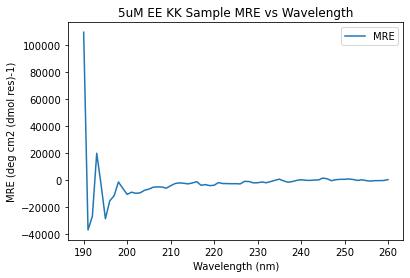

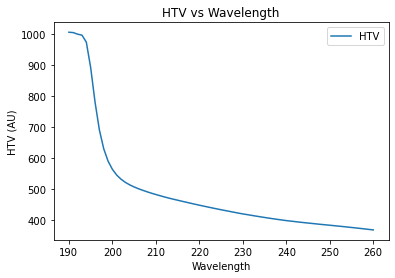

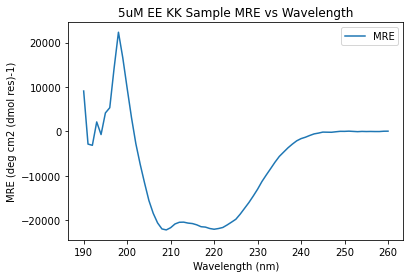

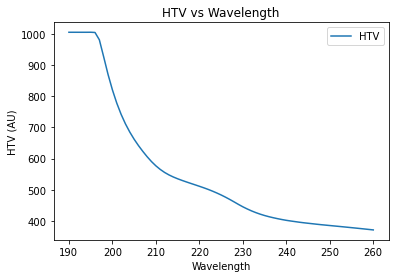

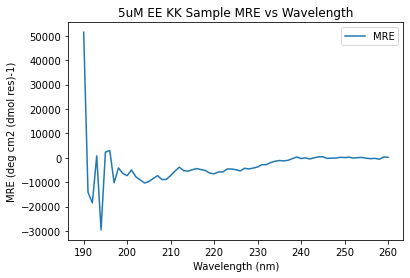

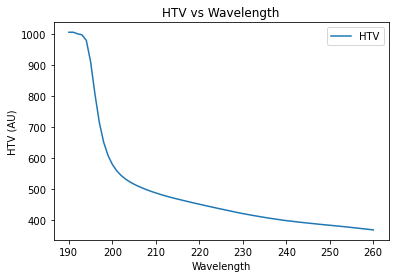

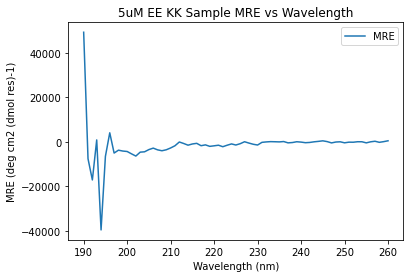

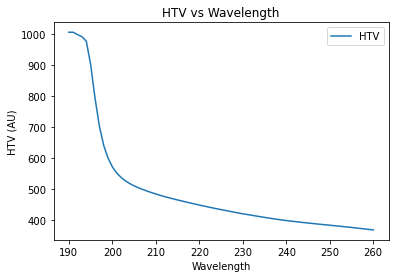

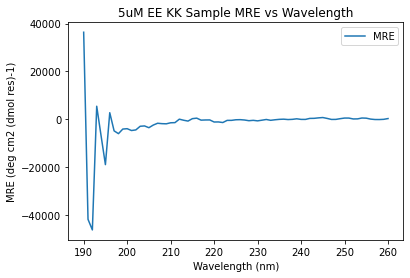

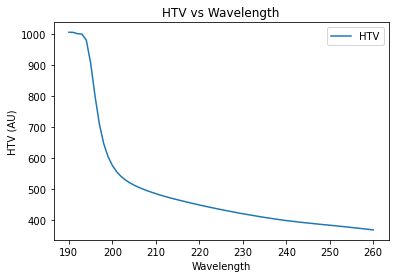

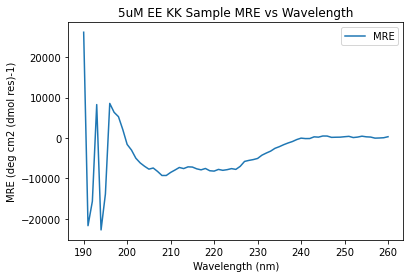

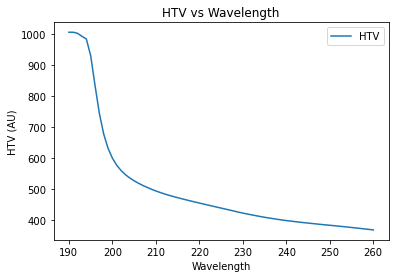

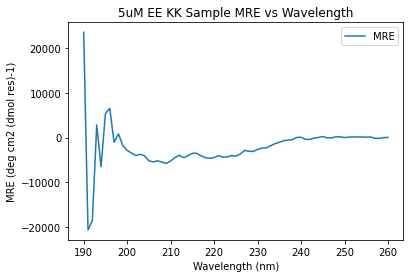

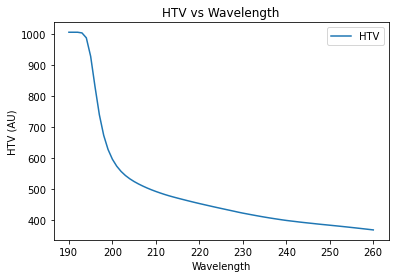

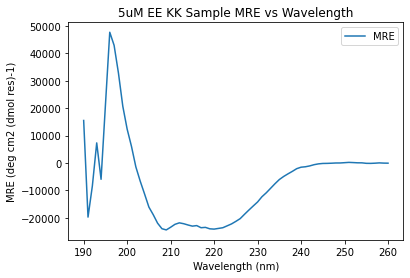

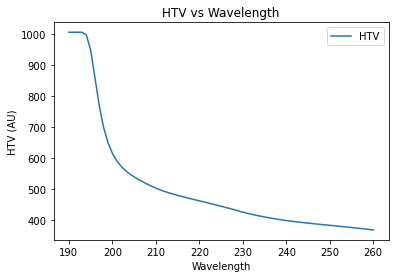

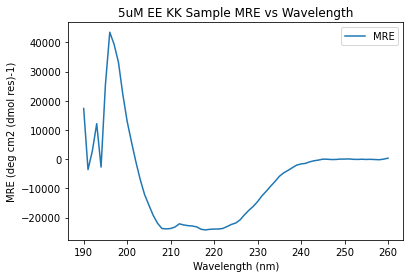

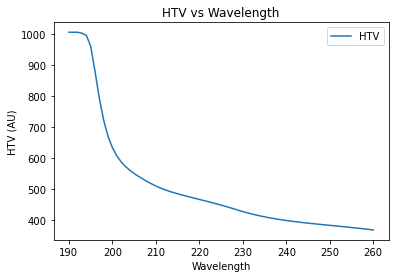

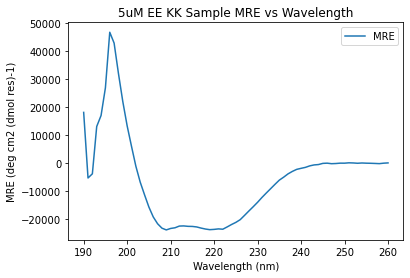

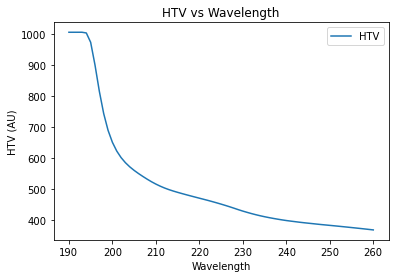

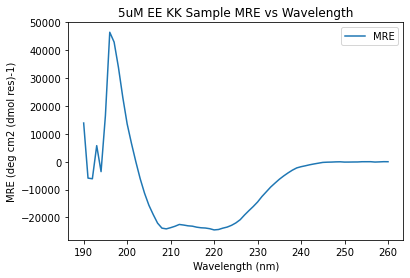

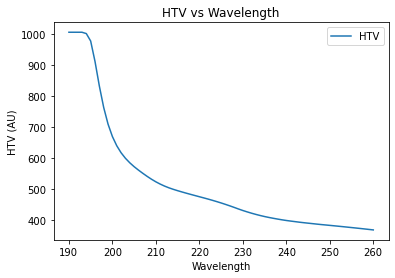

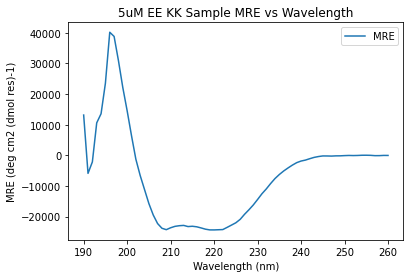

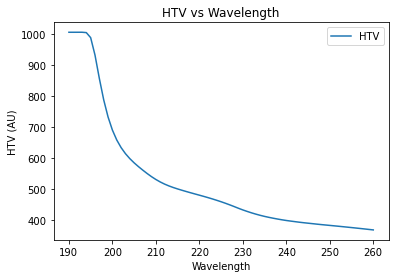

In [18]:
import matplotlib.pyplot as plt  
import numpy as np
i = 0
for data in normalised_data:
    heading = titles[i]
    fig,ax=plt.subplots()
    plt.title(heading + " MRE vs Wavelength")
    data.plot(x = "Wavelength", y = "MRE", ax = ax)
    plt.ylabel("MRE (deg cm2 (dmol res)-1)")
    ax.set_xlabel("Wavelength (nm)")
    
    fig,ax1=plt.subplots()
    plt.title("HTV vs Wavelength")
    data.plot(x = "Wavelength", y = "HTV", ax = ax1)
    ax.set_xlabel("Wavelength (nm)")
    plt.ylabel("HTV (AU)")